# Breast Cancer Detection Using Machine Learning Classifier

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Exploratory data analysis 

In [2]:
data=load_breast_cancer()
dataset=pd.DataFrame(data=data['data'],columns=data['feature_names'])
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
dataset.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
dataset.shape

(569, 30)

In [6]:
df=pd.DataFrame(data['target'],columns=['target'])
df

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [7]:
df.shape

(569, 1)

In [8]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [9]:
dataset[dataset.duplicated()==True]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


In [10]:
dataset.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

# Data Visualization 
Now, we have a basic understanding of our data. I will supplement it with some data visualization to get better understanding of our data.

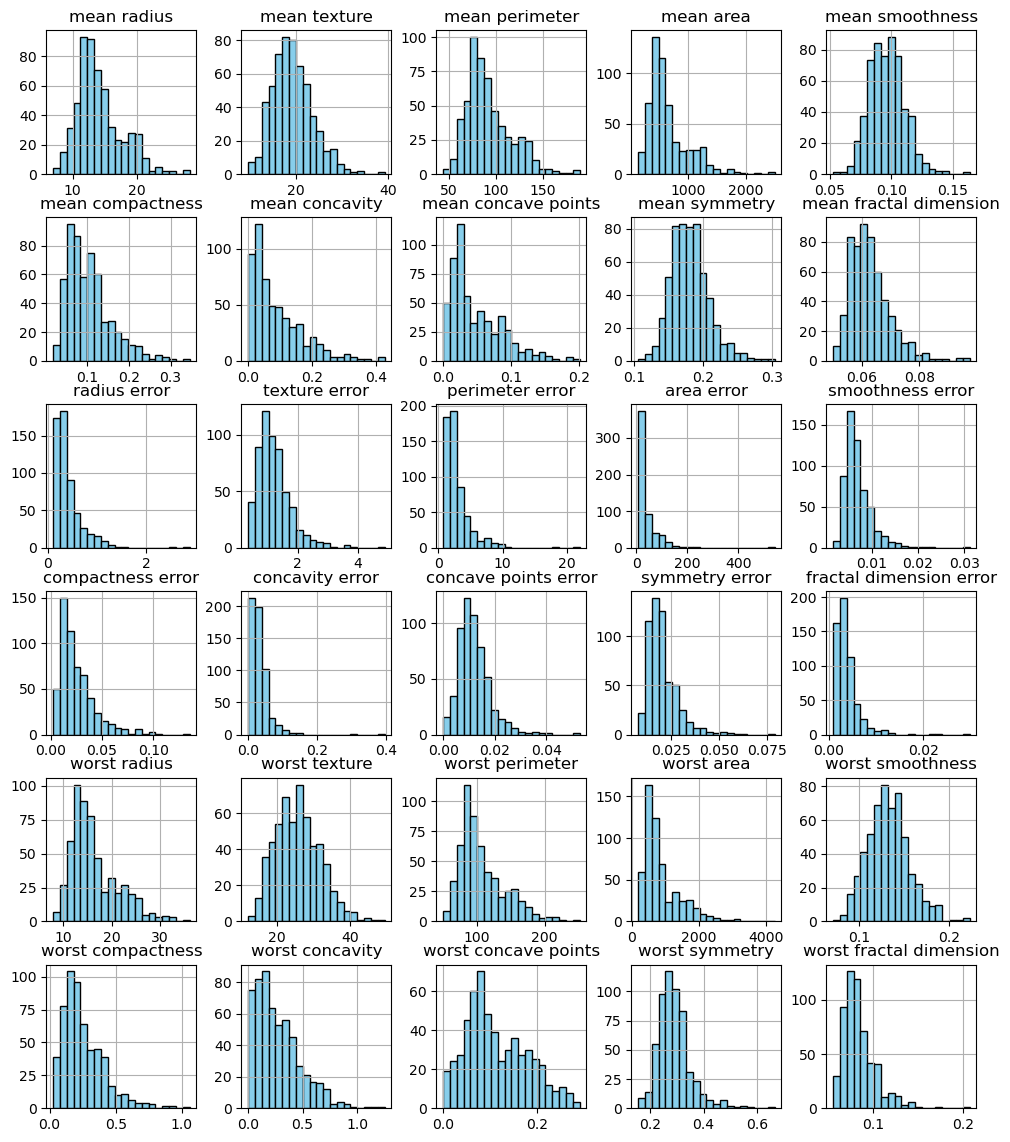

In [11]:
dataset.hist(bins=20, figsize=(12, 14), color='skyblue', edgecolor='black')
plt.show()

We can see that all the variables in the dataset are positively skewed.

<AxesSubplot:xlabel='target', ylabel='count'>

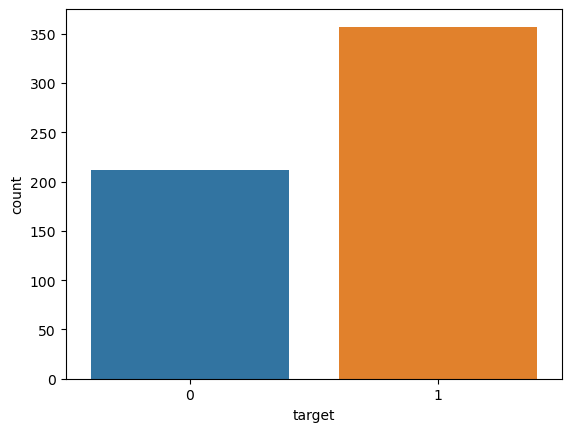

In [12]:
import seaborn as sns
sns.countplot(x='target', data=df)

We observe that nearly 60% of individuals in the dataset have been diagnosed with breast cancer

In [13]:
df_conc=pd.concat([dataset, df], axis=1)
df_conc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


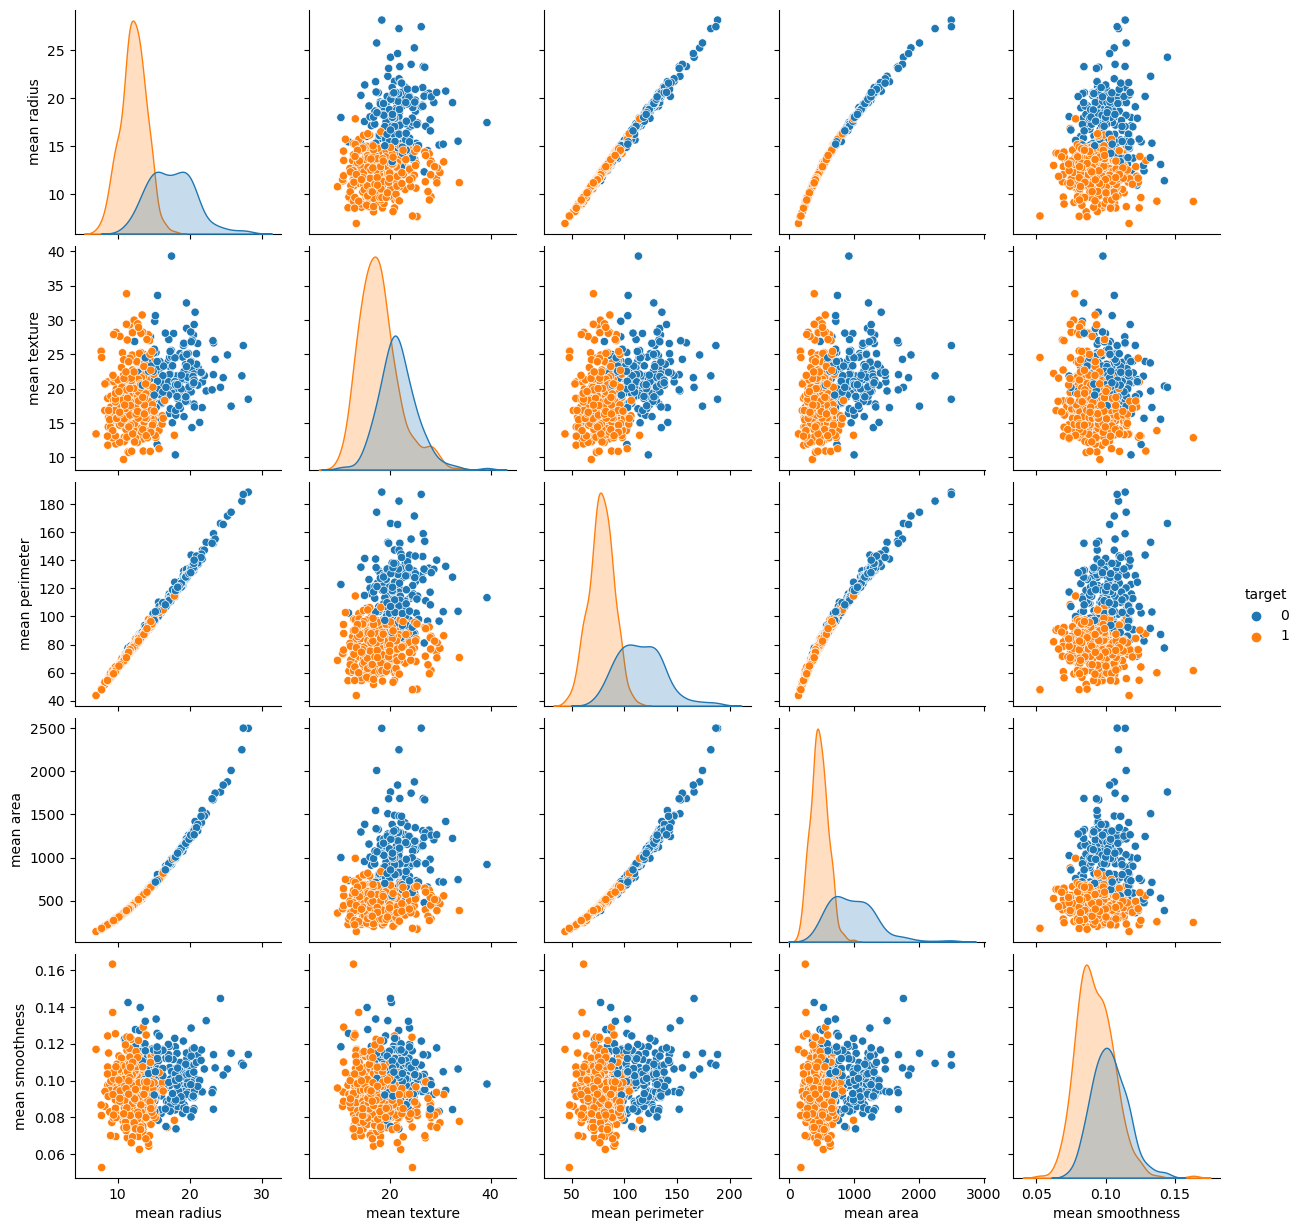

In [14]:
# pair plot of sample feature
sns.pairplot(df_conc, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] )

The pair plot visually represents the distribution of malignant and benign tumor data across two distinct classes. The differentiation between the two classes is clearly evident in the pair plot.

<AxesSubplot:>

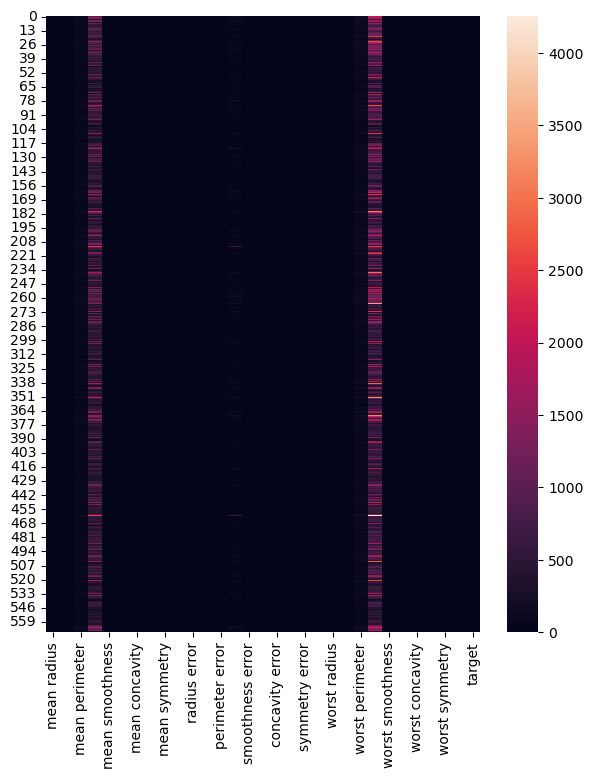

In [15]:
# heatmap of DataFrame
plt.figure(figsize=(7,8))
sns.heatmap(df_conc)

In the heatmap , we observe a range of values for different features. Specifically, the features 'mean area' and 'worst area' exhibit higher values compared to other features. Additionally, the values for 'mean perimeter' and 'worst perimeter' are slightly less than those of 'mean area' and 'worst area' but are greater than the values of the remaining features.

# Estimating correlation coefficients
Our dataset is very small. So, we can compute the standard correlation coefficient between every pair of attributes. We can compute it using the df.corr() method as follows:

In [16]:
correlation = df_conc.corr()

In [17]:
correlation['target'].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

<AxesSubplot:title={'center':'Correlation of Attributes with targetvariable'}>

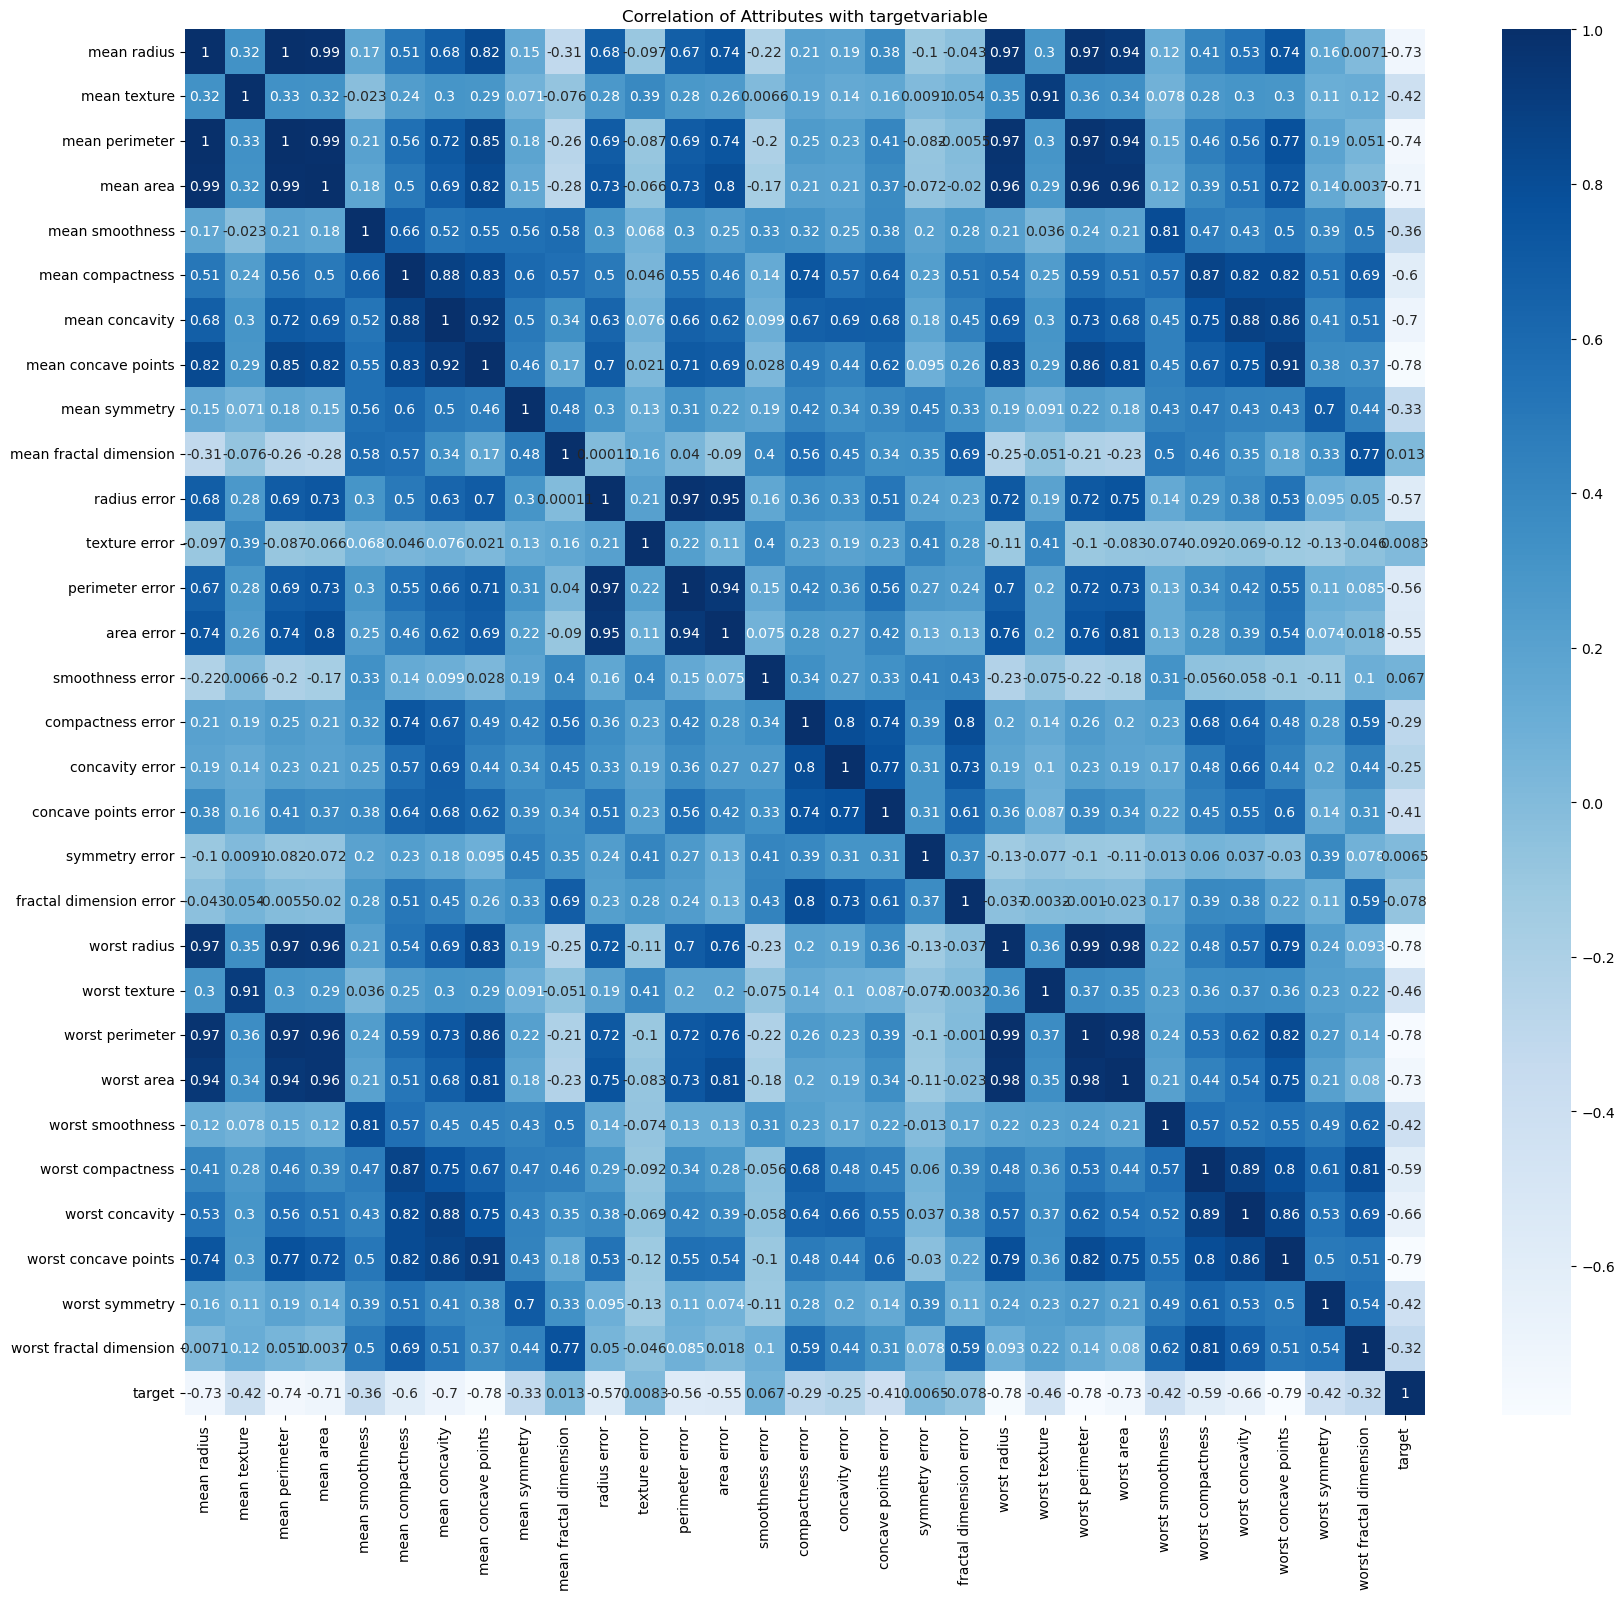

In [18]:
#Correlation Heat Map
plt.figure(figsize=(20,18))
plt.title('Correlation of Attributes with targetvariable')
sns.heatmap(correlation,annot=True,cmap='Blues')

# training model

In [19]:
from sklearn.model_selection import train_test_split
X=dataset.copy()
y=data['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=0.3)

In [20]:
#scaling data
from sklearn.preprocessing import StandardScaler
stan=StandardScaler()
X_train=stan.fit_transform(X_train)
X_test=stan.transform(X_test)

# DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3,ccp_alpha=0.01,min_samples_leaf=5,criterion='gini')#ccp_alpha:avoid overfitting
clf = clf.fit(X_train, y_train)

In [22]:
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [23]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [24]:
clf.predict_proba(X_test)

array([[0.29411765, 0.70588235],
       [0.02586207, 0.97413793],
       [0.98529412, 0.01470588],
       [0.98529412, 0.01470588],
       [0.98529412, 0.01470588],
       [0.98529412, 0.01470588],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.29411765, 0.70588235],
       [0.29411765, 0.70588235],
       [0.98529412, 0.01470588],
       [0.29411765, 0.70588235],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.98529412, 0.01470588],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.98529412, 0.01470588],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.02586207, 0.97413793],
       [0.

# model evaluating

In [25]:
from sklearn import metrics
print("confusion matrix :\n",metrics.confusion_matrix(y_pred,y_test,labels=[0,1]))
print('accuracy:\n',np.round(100*metrics.accuracy_score(y_test,y_pred),4))
print('precision:\n',np.round(100*metrics.precision_score(y_test,y_pred),4))
print(metrics.classification_report(y_test,y_pred,target_names=['malignant','benign']))

confusion matrix :
 [[ 49   8]
 [  5 109]]
accuracy:
 92.3977
precision:
 95.614
              precision    recall  f1-score   support

   malignant       0.86      0.91      0.88        54
      benign       0.96      0.93      0.94       117

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.93      0.92      0.92       171



we get accuracy :92%

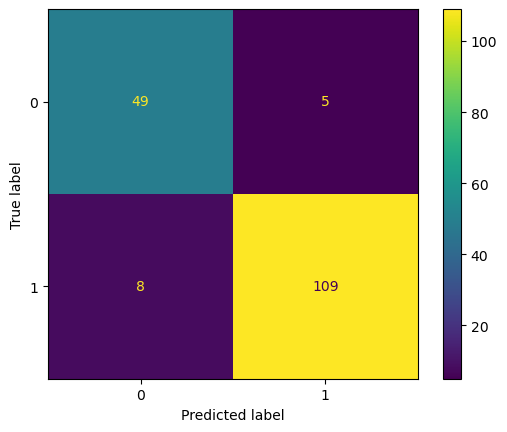

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test)

In [27]:
feature_name=X.columns
feature_name

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

# Identify the significant features for the decision tree.

In [28]:
clf.feature_importances_

array([0.        , 0.04373311, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.85193546, 0.        ,
       0.        , 0.        , 0.10433143, 0.        , 0.        ])

In [29]:
feature_importance=pd.DataFrame(clf.feature_importances_,index=feature_name).sort_values(by=0,ascending=False)
feature_importance

,0
worst area,0.851935
worst concave points,0.104331
mean texture,0.043733
mean radius,0.000000
worst symmetry,0.000000
worst concavity,0.000000
worst compactness,0.000000
worst smoothness,0.000000
worst perimeter,0.000000
worst texture,0.000000


In [30]:
features=list(feature_importance[feature_importance[0]>0].index)
features

['worst area', 'worst concave points', 'mean texture']

<AxesSubplot:>

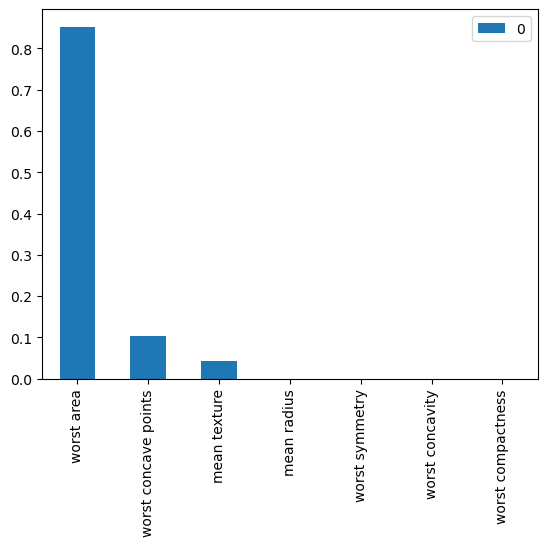

In [31]:
feature_importance.head(7).plot(kind='bar')

# another methode to see how your model is working

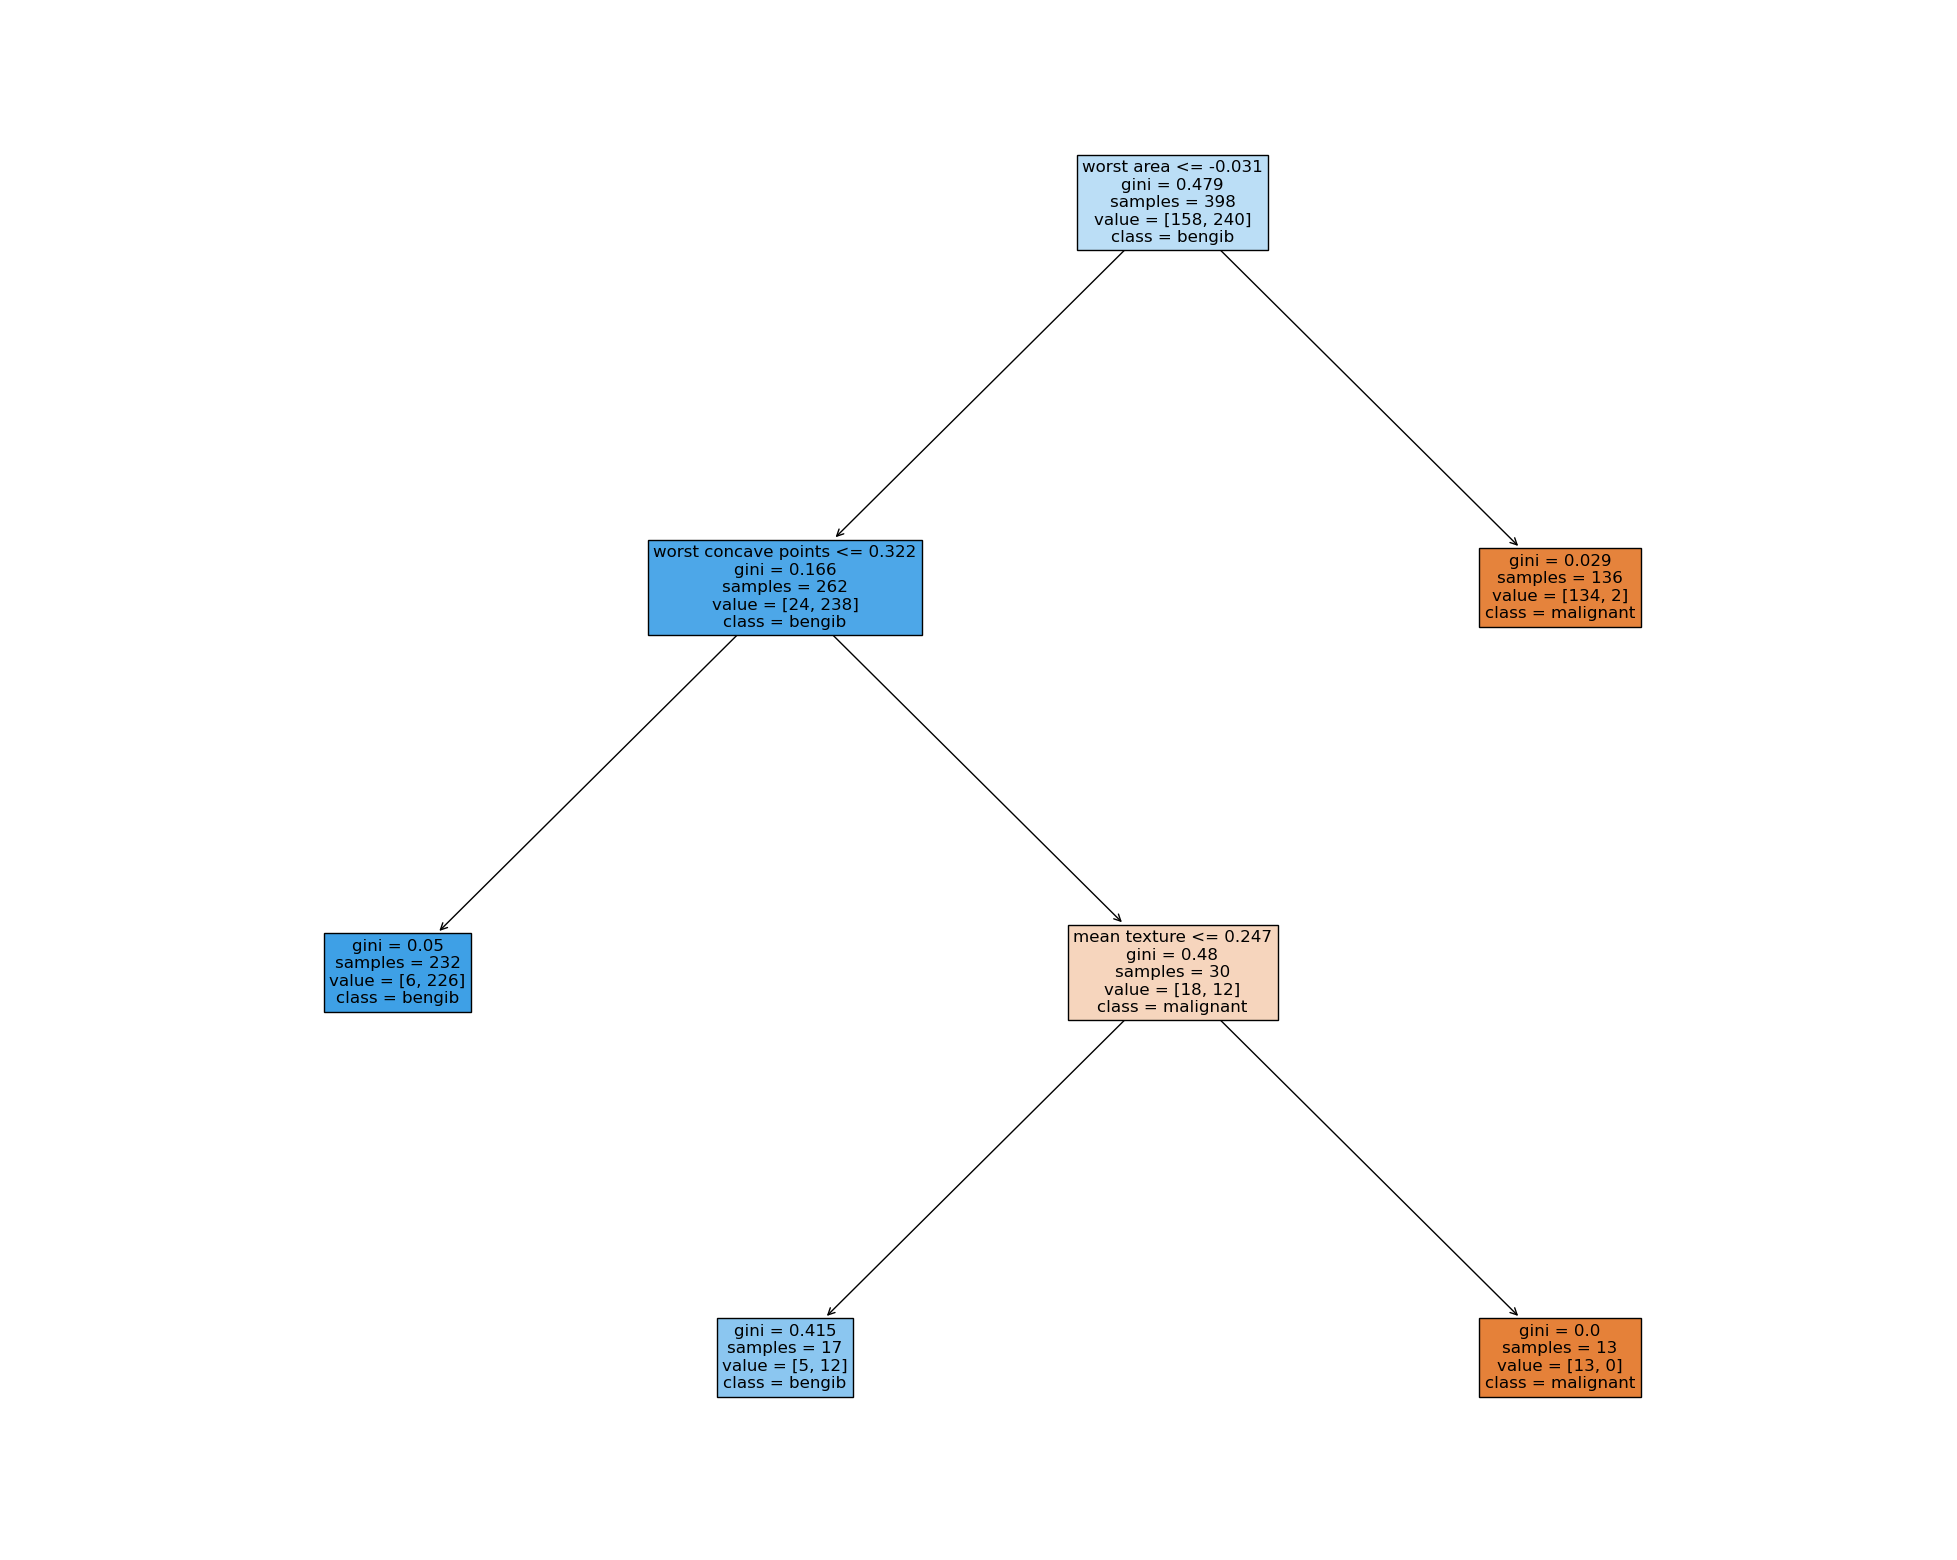

In [32]:
from sklearn import tree
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(clf,
                 feature_names=feature_name,
                 class_names={0:'malignant',1:'bengib'},
                 filled=True,
                 fontsize=12
                )

# Conclusion:

In this project, I leveraged machine learning techniques to predict the presence of Breast Cancer  in individuals. The process involved importing and analyzing the data through various plots. Subsequently, I scaled other features to prepare the dataset for modeling. The DecisionTree Classifier was applied to make predictions, ultimately yielding an impressive accuracy score of 92%